<a href="https://colab.research.google.com/github/wa-le/student-grades-vs-social-impact/blob/master/HSstudents_academics_vs_social_economic_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this project is to analyze the [dataset](https://www.kaggle.com/datasets/gabrielluizone/high-school-alcoholism-and-academic-performance) of high school student's alcohol consumption and its effect on their academic performance. I will analye the dataset and fit a classification model to predict students performance.


In [ ]:
%cd /content/drive/MyDrive/Data Projects/High School Alcoholism and Academic Performance

/content/drive/MyDrive/Data Projects/High School Alcoholism and Academic Performance


In [ ]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2023-12-09 00:15:16.314707


In [ ]:
# restart session after installation
#%pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
# restart session after installing "ydata-profiling" before import
#%pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport as pr

In [ ]:
%pip install xgboost

# Load Libraries and Data

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np

# check null values in DF
import missingno

# Charts
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
# load data
data = pd.read_csv("en_lpor_explorer.csv")
data.shape

(649, 31)

In [ ]:
data.head(2)

School  Gender  Age Housing_Type Family_Size  Parental_Status  \
0  Gabriel Pereira  Female   18        Urban     Above 3        Separated   
1  Gabriel Pereira  Female   17        Urban     Above 3  Living Together   

   Mother_Education  Father_Education Mother_Work Father_Work  ... Is_Dating  \
0  Higher Education  Higher Education   Homemaker     Teacher  ...        No   
1    Primary School    Primary School   Homemaker       other  ...        No   

  Good_Family_Relationship Free_Time_After_School Time_with_Friends  \
0                     Good               Moderate              High   
1                Excellent               Moderate          Moderate   

  Alcohol_Weekdays Alcohol_Weekends Health_Status School_Absence  \
0         Very Low         Very Low          Fair              4   
1         Very Low         Very Low          Fair              2   

  Grade_1st_Semester Grade_2nd_Semester  
0                  0                 11  
1                  9                 11  

[2 rows x 31 columns]

In [ ]:
data.head(2).T

0                  1
School                          Gabriel Pereira    Gabriel Pereira
Gender                                   Female             Female
Age                                          18                 17
Housing_Type                              Urban              Urban
Family_Size                             Above 3            Above 3
Parental_Status                       Separated    Living Together
Mother_Education               Higher Education     Primary School
Father_Education               Higher Education     Primary School
Mother_Work                           Homemaker          Homemaker
Father_Work                             Teacher              other
Reason_School_Choice          Course Preference  Course Preference
Legal_Responsibility                     Mother             Father
Commute_Time                       15 to 30 min       Up to 15 min
Weekly_Study_Time                       2 to 5h            2 to 5h
Extra_Educational_Support                   Yes                 No
Parental_Educational_Support                 No                Yes
Private_Tutoring                             No                 No
Extracurricular_Activities                   No                 No
Attended_Daycare                            Yes                 No
Desire_Graduate_Education                   Yes                Yes
Has_Internet                                 No                Yes
Is_Dating                                    No                 No
Good_Family_Relationship                   Good          Excellent
Free_Time_After_School                 Moderate           Moderate
Time_with_Friends                          High           Moderate
Alcohol_Weekdays                       Very Low           Very Low
Alcohol_Weekends                       Very Low           Very Low
Health_Status                              Fair               Fair
School_Absence                                4                  2
Grade_1st_Semester                            0                  9
Grade_2nd_Semester                           11                 11

# Explopratory Data Analysis

### Quick EDA with Pandas Profiling

In [ ]:
quick_eda = pr(data, title="Report")
quick_eda

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### More EDA/Data Cleaning and Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   School                        649 non-null    object
 1   Gender                        649 non-null    object
 2   Age                           649 non-null    int64 
 3   Housing_Type                  649 non-null    object
 4   Family_Size                   649 non-null    object
 5   Parental_Status               649 non-null    object
 6   Mother_Education              649 non-null    object
 7   Father_Education              649 non-null    object
 8   Mother_Work                   649 non-null    object
 9   Father_Work                   649 non-null    object
 10  Reason_School_Choice          649 non-null    object
 11  Legal_Responsibility          649 non-null    object
 12  Commute_Time                  649 non-null    object
 13  Weekly_Study_Time   

In [ ]:
data.describe()

Age  School_Absence  Grade_1st_Semester  Grade_2nd_Semester
count  649.000000      649.000000          649.000000          649.000000
mean    16.744222        3.659476           11.399076           11.570108
std      1.218138        4.640759            2.745265            2.913639
min     15.000000        0.000000            0.000000            0.000000
25%     16.000000        0.000000           10.000000           10.000000
50%     17.000000        2.000000           11.000000           11.000000
75%     18.000000        6.000000           13.000000           13.000000
max     22.000000       32.000000           19.000000           19.000000

In [ ]:
display(data.columns)
print(len(data.columns))

Index(['School', 'Gender', 'Age', 'Housing_Type', 'Family_Size',
       'Parental_Status', 'Mother_Education', 'Father_Education',
       'Mother_Work', 'Father_Work', 'Reason_School_Choice',
       'Legal_Responsibility', 'Commute_Time', 'Weekly_Study_Time',
       'Extra_Educational_Support', 'Parental_Educational_Support',
       'Private_Tutoring', 'Extracurricular_Activities', 'Attended_Daycare',
       'Desire_Graduate_Education', 'Has_Internet', 'Is_Dating',
       'Good_Family_Relationship', 'Free_Time_After_School',
       'Time_with_Friends', 'Alcohol_Weekdays', 'Alcohol_Weekends',
       'Health_Status', 'School_Absence', 'Grade_1st_Semester',
       'Grade_2nd_Semester'],
      dtype='object')

31


In [ ]:
data.isna().sum()

School                          0
Gender                          0
Age                             0
Housing_Type                    0
Family_Size                     0
Parental_Status                 0
Mother_Education                0
Father_Education                0
Mother_Work                     0
Father_Work                     0
Reason_School_Choice            0
Legal_Responsibility            0
Commute_Time                    0
Weekly_Study_Time               0
Extra_Educational_Support       0
Parental_Educational_Support    0
Private_Tutoring                0
Extracurricular_Activities      0
Attended_Daycare                0
Desire_Graduate_Education       0
Has_Internet                    0
Is_Dating                       0
Good_Family_Relationship        0
Free_Time_After_School          0
Time_with_Friends               0
Alcohol_Weekdays                0
Alcohol_Weekends                0
Health_Status                   0
School_Absence                  0
Grade_1st_Seme

In [ ]:
data.corr()

Age  School_Absence  Grade_1st_Semester  \
Age                 1.000000        0.149998           -0.174322   
School_Absence      0.149998        1.000000           -0.147149   
Grade_1st_Semester -0.174322       -0.147149            1.000000   
Grade_2nd_Semester -0.107119       -0.124745            0.864982   

                    Grade_2nd_Semester  
Age                          -0.107119  
School_Absence               -0.124745  
Grade_1st_Semester            0.864982  
Grade_2nd_Semester            1.000000

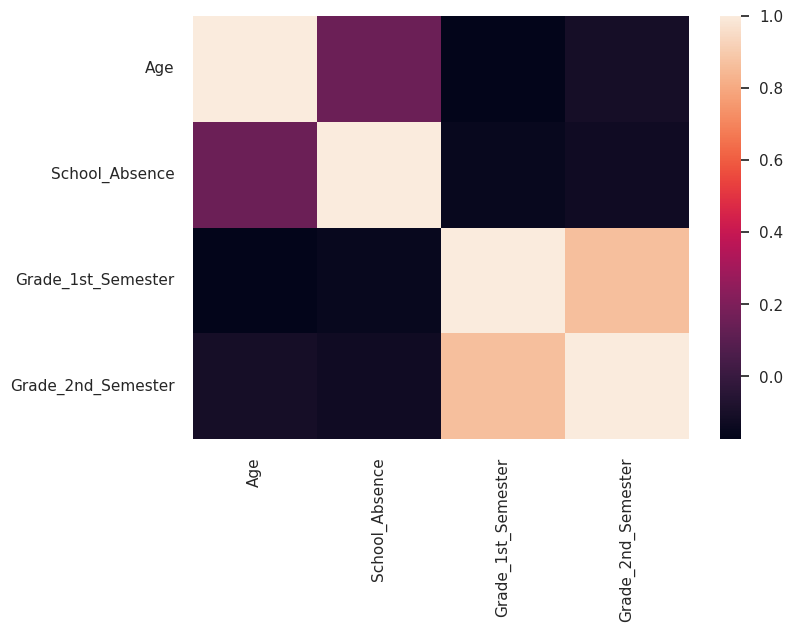

In [ ]:
sns.heatmap(data.corr())
plt.show()

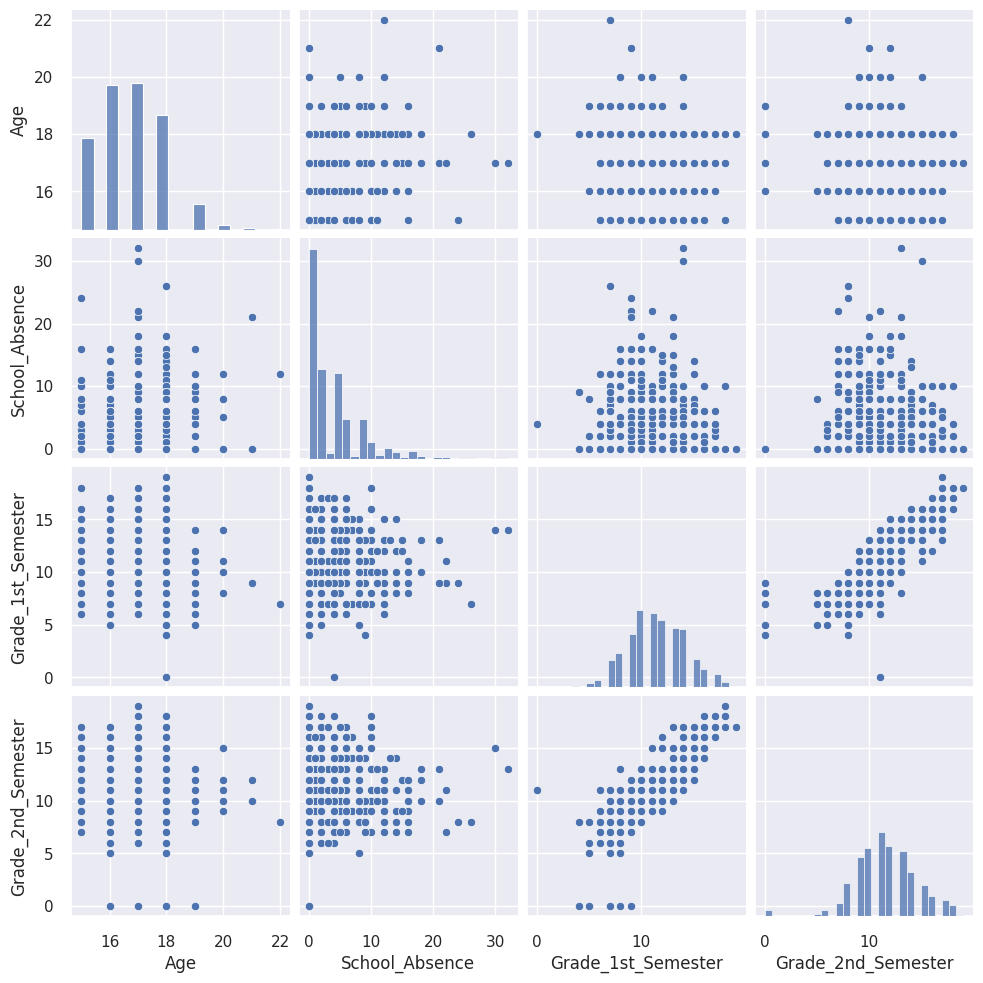

In [ ]:
sns.pairplot(data)

In [ ]:
from pandas.api.types import is_string_dtype as is_str

In [ ]:
is_str(data['Alcohol_Weekends'])

True

In [ ]:
# find columns with string dtypes and check their value counts
for label, content in data.items():
  if is_str(content):
    print(data[label].value_counts())
    print("")

Gabriel Pereira         423
Mousinho da Silveira    226
Name: School, dtype: int64

Female    383
Male      266
Name: Gender, dtype: int64

Urban    452
Rural    197
Name: Housing_Type, dtype: int64

Above 3    457
Up to 3    192
Name: Family_Size, dtype: int64

Living Together    569
Separated           80
Name: Parental_Status, dtype: int64

Lower Secondary School    186
Higher Education          175
Primary School            143
High School               139
None                        6
Name: Mother_Education, dtype: int64

Lower Secondary School    209
Primary School            174
High School               131
Higher Education          128
None                        7
Name: Father_Education, dtype: int64

other        258
Services     136
Homemaker    135
Teacher       72
Health        48
Name: Mother_Work, dtype: int64

other        367
Services     181
Homemaker     42
Teacher       36
Health        23
Name: Father_Work, dtype: int64

Course Preference    285
Near Home        

####Feature Engineering

In [ ]:
# need to get a target variable from the grades of both semester
# a final_grade column that takes both semester grade and uses the average
# if average < 10 the its a fail(0) else pass(1)

data["final_grade"] = (data['Grade_1st_Semester'] + data['Grade_2nd_Semester'])/2
data["final_grade"] = data["final_grade"].apply(lambda x: 0 if x < 10.0 else 1)

In [ ]:
data.T

0                  1    \
School                          Gabriel Pereira    Gabriel Pereira   
Gender                                   Female             Female   
Age                                          18                 17   
Housing_Type                              Urban              Urban   
Family_Size                             Above 3            Above 3   
Parental_Status                       Separated    Living Together   
Mother_Education               Higher Education     Primary School   
Father_Education               Higher Education     Primary School   
Mother_Work                           Homemaker          Homemaker   
Father_Work                             Teacher              other   
Reason_School_Choice          Course Preference  Course Preference   
Legal_Responsibility                     Mother             Father   
Commute_Time                       15 to 30 min       Up to 15 min   
Weekly_Study_Time                       2 to 5h            2 to 5h   
Extra_Educational_Support                   Yes                 No   
Parental_Educational_Support                 No                Yes   
Private_Tutoring                             No                 No   
Extracurricular_Activities                   No                 No   
Attended_Daycare                            Yes                 No   
Desire_Graduate_Education                   Yes                Yes   
Has_Internet                                 No                Yes   
Is_Dating                                    No                 No   
Good_Family_Relationship                   Good          Excellent   
Free_Time_After_School                 Moderate           Moderate   
Time_with_Friends                          High           Moderate   
Alcohol_Weekdays                       Very Low           Very Low   
Alcohol_Weekends                       Very Low           Very Low   
Health_Status                              Fair               Fair   
School_Absence                                4                  2   
Grade_1st_Semester                            0                  9   
Grade_2nd_Semester                           11                 11   
final_grade                                   0                  1   

                                          2                       3    \
School                        Gabriel Pereira         Gabriel Pereira   
Gender                                 Female                  Female   
Age                                        15                      15   
Housing_Type                            Urban                   Urban   
Family_Size                           Up to 3                 Above 3   
Parental_Status               Living Together         Living Together   
Mother_Education               Primary School        Higher Education   
Father_Education               Primary School  Lower Secondary School   
Mother_Work                         Homemaker                  Health   
Father_Work                             other                Services   
Reason_School_Choice                    Other               Near Home   
Legal_Responsibility                   Mother                  Mother   
Commute_Time                     Up to 15 min            Up to 15 min   
Weekly_Study_Time                     2 to 5h                5 to 10h   
Extra_Educational_Support                 Yes                      No   
Parental_Educational_Support               No                     Yes   
Private_Tutoring                           No                      No   
Extracurricular_Activities                 No                     Yes   
Attended_Daycare                          Yes                     Yes   
Desire_Graduate_Education                 Yes                     Yes   
Has_Internet                              Yes                     Yes   
Is_Dating                                  No                     Yes   
Good_Family_Relationship                 Good         

In [ ]:
# drop grades for both semester
data.drop(columns=['Grade_1st_Semester', 'Grade_2nd_Semester'], inplace=True)

In [ ]:
data.T

0                  1    \
School                          Gabriel Pereira    Gabriel Pereira   
Gender                                   Female             Female   
Age                                          18                 17   
Housing_Type                              Urban              Urban   
Family_Size                             Above 3            Above 3   
Parental_Status                       Separated    Living Together   
Mother_Education               Higher Education     Primary School   
Father_Education               Higher Education     Primary School   
Mother_Work                           Homemaker          Homemaker   
Father_Work                             Teacher              other   
Reason_School_Choice          Course Preference  Course Preference   
Legal_Responsibility                     Mother             Father   
Commute_Time                       15 to 30 min       Up to 15 min   
Weekly_Study_Time                       2 to 5h            2 to 5h   
Extra_Educational_Support                   Yes                 No   
Parental_Educational_Support                 No                Yes   
Private_Tutoring                             No                 No   
Extracurricular_Activities                   No                 No   
Attended_Daycare                            Yes                 No   
Desire_Graduate_Education                   Yes                Yes   
Has_Internet                                 No                Yes   
Is_Dating                                    No                 No   
Good_Family_Relationship                   Good          Excellent   
Free_Time_After_School                 Moderate           Moderate   
Time_with_Friends                          High           Moderate   
Alcohol_Weekdays                       Very Low           Very Low   
Alcohol_Weekends                       Very Low           Very Low   
Health_Status                              Fair               Fair   
School_Absence                                4                  2   
final_grade                                   0                  1   

                                          2                       3    \
School                        Gabriel Pereira         Gabriel Pereira   
Gender                                 Female                  Female   
Age                                        15                      15   
Housing_Type                            Urban                   Urban   
Family_Size                           Up to 3                 Above 3   
Parental_Status               Living Together         Living Together   
Mother_Education               Primary School        Higher Education   
Father_Education               Primary School  Lower Secondary School   
Mother_Work                         Homemaker                  Health   
Father_Work                             other                Services   
Reason_School_Choice                    Other               Near Home   
Legal_Responsibility                   Mother                  Mother   
Commute_Time                     Up to 15 min            Up to 15 min   
Weekly_Study_Time                     2 to 5h                5 to 10h   
Extra_Educational_Support                 Yes                      No   
Parental_Educational_Support               No                     Yes   
Private_Tutoring                           No                      No   
Extracurricular_Activities                 No                     Yes   
Attended_Daycare                          Yes                     Yes   
Desire_Graduate_Education                 Yes                     Yes   
Has_Internet                              Yes                     Yes   
Is_Dating                                  No                     Yes   
Good_Family_Relationship                 Good                    Fair   
Free_Time_After_School               Moderate                     Low   
Time_with_Friends                         Low   

In [ ]:
# convert object to categories

for label, content in data.items():
  # using the pd api types lib - check if col is string
  if is_str(content):
    # if col is string, convert the col to category
    data[label] = content.astype("category").cat.as_ordered()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   School                        649 non-null    category
 1   Gender                        649 non-null    category
 2   Age                           649 non-null    int64   
 3   Housing_Type                  649 non-null    category
 4   Family_Size                   649 non-null    category
 5   Parental_Status               649 non-null    category
 6   Mother_Education              649 non-null    category
 7   Father_Education              649 non-null    category
 8   Mother_Work                   649 non-null    category
 9   Father_Work                   649 non-null    category
 10  Reason_School_Choice          649 non-null    category
 11  Legal_Responsibility          649 non-null    category
 12  Commute_Time                  649 non-null    cate

In [ ]:
from pandas.api.types import is_numeric_dtype as is_num

In [ ]:
# Convert categorical features to integers
for label, content in data.items():
  if not is_num(content):
    # Turn categories into numbers(cat-code)
    # no adding of +1 because we have no null value in dataset
    data[label] = pd.Categorical(content).codes

In [ ]:
data.head(3)

School  Gender  Age  Housing_Type  Family_Size  Parental_Status  \
0       0       0   18             1            0                1   
1       0       0   17             1            0                0   
2       0       0   15             1            1                0   

   Mother_Education  Father_Education  Mother_Work  Father_Work  ...  \
0                 1                 1            1            3  ...   
1                 4                 4            1            4  ...   
2                 4                 4            1            4  ...   

   Has_Internet  Is_Dating  Good_Family_Relationship  Free_Time_After_School  \
0             0          0                         2                       2   
1             1          0                         0                       2   
2             1          0                         2                       2   

   Time_with_Friends  Alcohol_Weekdays  Alcohol_Weekends  Health_Status  \
0                  0                 4                 4              0   
1                  2                 4                 4              0   
2                  1                 1                 2              0   

   School_Absence  final_grade  
0               4            0  
1               2            1  
2               6            1  

[3 rows x 30 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   School                        649 non-null    int8 
 1   Gender                        649 non-null    int8 
 2   Age                           649 non-null    int64
 3   Housing_Type                  649 non-null    int8 
 4   Family_Size                   649 non-null    int8 
 5   Parental_Status               649 non-null    int8 
 6   Mother_Education              649 non-null    int8 
 7   Father_Education              649 non-null    int8 
 8   Mother_Work                   649 non-null    int8 
 9   Father_Work                   649 non-null    int8 
 10  Reason_School_Choice          649 non-null    int8 
 11  Legal_Responsibility          649 non-null    int8 
 12  Commute_Time                  649 non-null    int8 
 13  Weekly_Study_Time             649 n

In [ ]:
# all features are now of numeric datatypes

# Fit Models

### Split dataset

In [ ]:
# We need to separate our Features from our target
X = data.drop(columns="final_grade")
y = data["final_grade"]

In [ ]:
# We need to split our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Compare Models using Pycaret

In [ ]:
classif_setup = setup(data, target='final_grade')
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=6779, solver='auto',
                tol=0.0001)

### Fit and compare models manually

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores_train = {}
    model_scores_test = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores_train[name] = model.score(X_train, y_train)
        model_scores_test[name] = model.score(X_test, y_test)
    print(model_scores_train)
    print(model_scores_test)


model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7996146435452793, 'KNN': 0.7784200385356455, 'Random Forest': 1.0, 'XGBoost': 1.0}
{'Logistic Regression': 0.8076923076923077, 'KNN': 0.7769230769230769, 'Random Forest': 0.7846153846153846, 'XGBoost': 0.8}


In [ ]:
# copied from result above

to_compare = {'Logistic Regression': 0.8076923076923077, 'KNN': 0.7769230769230769, 'Random Forest': 0.7846153846153846, 'XGBoost': 0.8}

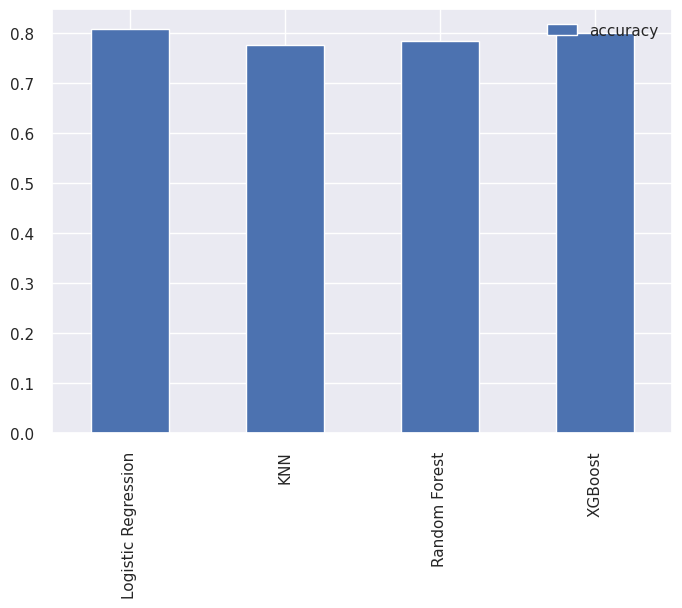

In [ ]:
# Compare Models
compare_models = pd.DataFrame(to_compare, index=["accuracy"])
compare_models.T.plot.bar();

### Finally settle for xgboost and tune its hyperparameters. First tune with RandomSearch CV

In [ ]:
# Define the XGBoost model
xgbst = XGBClassifier()
xgbst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
xgbst.score(X_train, y_train)

1.0

In [ ]:
xgbst.score(X_test, y_test)

0.8

In [ ]:
# Create a hyperparameter grid for XGBClassifier
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 2],
    'min_child_weight': [1, 3, 5]
}


In [ ]:
# Create the RandomizedSearchCV object
%%time
rscv_xgbst = RandomizedSearchCV(estimator=xgbst,
                                param_distributions=param_grid,
                                n_iter=12,
                                scoring='accuracy',
                                cv=3,
                                random_state=42)

# Fit the model
rscv_xgbst.fit(X_train, y_train)

CPU times: user 7.65 s, sys: 140 ms, total: 7.79 s
Wall time: 5.14 s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=No...
                                           objective='binary:logistic', ...),
                   n_iter=12, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 1, 2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 1.0]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [ ]:
rscv_xgbst.score(X_test, y_test)

0.8076923076923077

In [ ]:
# Get the best hyperparameters
best_params = rscv_xgbst.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
y_preds = rscv_xgbst.predict(X_test)

In [ ]:
y_preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
y_test

636    1
220    1
594    1
429    1
72     1
      ..
514    0
374    1
444    0
244    1
601    0
Name: final_grade, Length: 130, dtype: int64

# More Evaluations

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

Using Cross Validation where possible.

To make comparisons and evaluate our trained model, we make predictions first.

In [ ]:
y_preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
np.array(y_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
y_preds_proba = rscv_xgbst.predict_proba(X_test)

In [ ]:
y_preds_proba

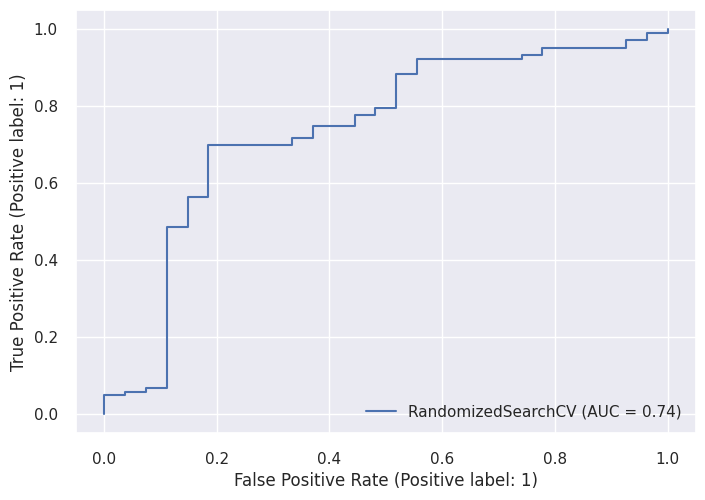

In [ ]:
RocCurveDisplay.from_estimator(rscv_xgbst, X_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[12 15]
 [10 93]]


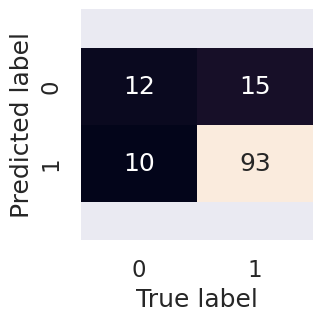

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.55      0.44      0.49        27
           1       0.86      0.90      0.88       103

    accuracy                           0.81       130
   macro avg       0.70      0.67      0.69       130
weighted avg       0.80      0.81      0.80       130



### Calculate evaluation metrics using cross-validation

Also have to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using **cross_val_score()**

In [ ]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(rscv_xgbst,
                         X,
                         y,
                         cv=20,
                         scoring="accuracy")
cv_accuracy

array([0.75757576, 0.72727273, 0.72727273, 0.72727273, 0.75757576,
       0.6969697 , 0.84848485, 0.81818182, 0.81818182, 0.625     ,
       0.78125   , 0.90625   , 0.78125   , 0.75      , 0.875     ,
       0.75      , 0.71875   , 0.5       , 0.625     , 0.59375   ])

In [ ]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.739251893939394

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(rscv_xgbst,
                         X,
                         y,
                         cv=20,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.863677536231884

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(rscv_xgbst,
                         X,
                         y,
                         cv=20,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8251690610319227

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(rscv_xgbst,
                         X,
                         y,
                         cv=20,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8071312990868554

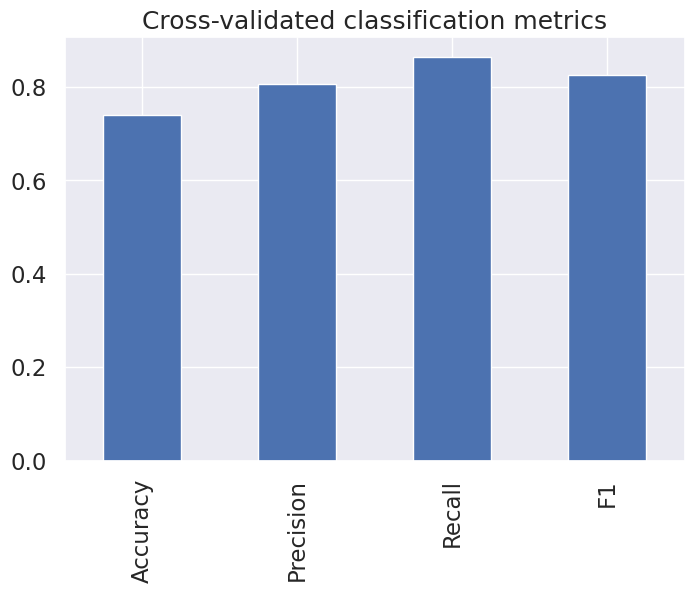

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

# Feature Importance

In [ ]:
best_model = rscv_xgbst.best_estimator_
feature_importance = best_model.feature_importances_

In [ ]:
feature_importance

array([0.12136239, 0.02678705, 0.02921308, 0.01907108, 0.02058246,
       0.03061075, 0.02417495, 0.04868852, 0.02739271, 0.01510374,
       0.01843408, 0.04515201, 0.0281883 , 0.03207649, 0.02303817,
       0.02791385, 0.01614404, 0.02293511, 0.02162194, 0.18289447,
       0.02319804, 0.02212632, 0.0227863 , 0.02236558, 0.03354252,
       0.0217004 , 0.02366597, 0.01897732, 0.03025233], dtype=float32)

In [ ]:
# Match features to columns
features_dict = dict(zip(data.columns, list(feature_importance)))
features_dict

{'School': 0.12136239,
 'Gender': 0.026787048,
 'Age': 0.02921308,
 'Housing_Type': 0.019071082,
 'Family_Size': 0.020582458,
 'Parental_Status': 0.030610751,
 'Mother_Education': 0.024174955,
 'Father_Education': 0.04868852,
 'Mother_Work': 0.027392708,
 'Father_Work': 0.015103736,
 'Reason_School_Choice': 0.018434078,
 'Legal_Responsibility': 0.045152012,
 'Commute_Time': 0.028188301,
 'Weekly_Study_Time': 0.032076485,
 'Extra_Educational_Support': 0.023038166,
 'Parental_Educational_Support': 0.027913846,
 'Private_Tutoring': 0.016144043,
 'Extracurricular_Activities': 0.022935111,
 'Attended_Daycare': 0.02162194,
 'Desire_Graduate_Education': 0.18289447,
 'Has_Internet': 0.023198042,
 'Is_Dating': 0.022126317,
 'Good_Family_Relationship': 0.022786302,
 'Free_Time_After_School': 0.022365585,
 'Time_with_Friends': 0.033542518,
 'Alcohol_Weekdays': 0.021700399,
 'Alcohol_Weekends': 0.02366597,
 'Health_Status': 0.018977316,
 'School_Absence': 0.030252326}

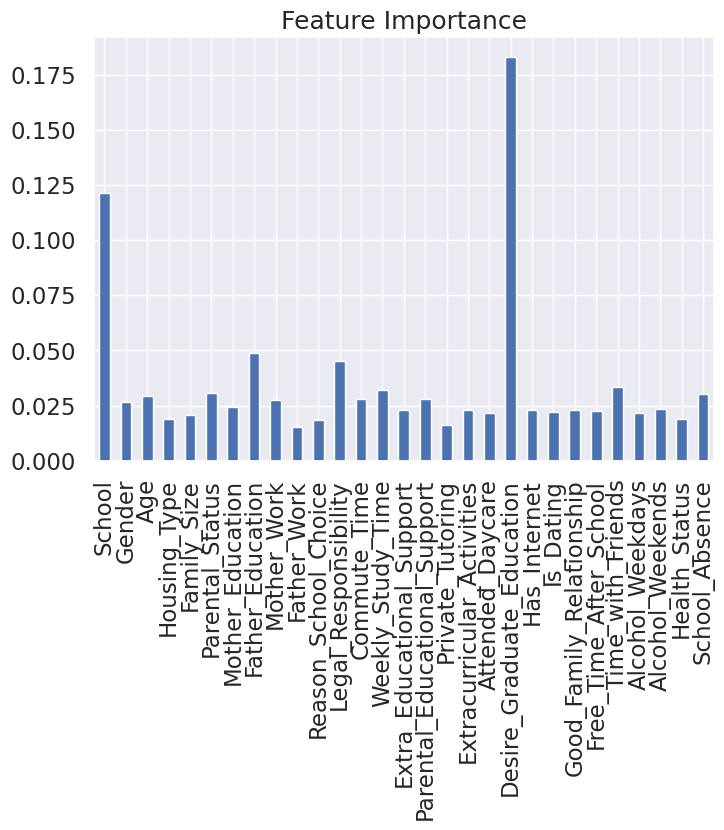

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
for label, content in X.items():
    display(pd.crosstab(data[label], data["final_grade"]))

final_grade    0    1
School               
0             68  355
1            103  123

final_grade   0    1
Gender              
0            85  298
1            86  180

final_grade   0    1
Age                 
15           16   96
16           44  133
17           44  135
18           44   96
19           19   13
20            2    4
21            1    1
22            1    0

final_grade    0    1
Housing_Type         
0             72  125
1             99  353

final_grade    0    1
Family_Size          
0            125  332
1             46  146

final_grade        0    1
Parental_Status          
0                152  417
1                 19   61

final_grade        0    1
Mother_Education         
0                 33  106
1                 22  153
2                 56  130
3                  2    4
4                 58   85

final_grade        0    1
Father_Education         
0                 15  116
1                 22  106
2                 59  150
3                  1    6
4                 74  100

final_grade   0    1
Mother_Work         
0            11   37
1            52   83
2            24  112
3             9   63
4            75  183

final_grade   0    1
Father_Work         
0             5   18
1            14   28
2            53  128
3             4   32
4            95  272

final_grade            0    1
Reason_School_Choice         
0                     93  192
1                     29  120
2                     28   44
3                     21  122

final_grade             0    1
Legal_Responsibility          
0                      26  127
1                     126  329
2                      19   22

final_grade    0    1
Commute_Time         
0             61  152
1             23   31
2              8    8
3             79  287

final_grade         0    1
Weekly_Study_Time         
0                  73  232
1                  11   86
2                   4   31
3                  83  129

final_grade                  0    1
Extra_Educational_Support          
0                          152  429
1                           19   49

final_grade                    0    1
Parental_Educational_Support         
0                             73  178
1                             98  300

final_grade         0    1
Private_Tutoring          
0                 160  450
1                  11   28

final_grade                  0    1
Extracurricular_Activities         
0                           99  235
1                           72  243

final_grade         0    1
Attended_Daycare          
0                  37   91
1                 134  387

final_grade                  0    1
Desire_Graduate_Education          
0                           50   19
1                          121  459

final_grade     0    1
Has_Internet          
0              59   92
1             112  386

final_grade   0    1
Is_Dating           
0            98  312
1            73  166

final_grade                0    1
Good_Family_Relationship         
0                         51  129
1                         31   70
2                         69  248
3                          9   20
4                         11   11

final_grade              0    1
Free_Time_After_School         
0                       55  123
1                       22   85
2                       58  193
3                       26   42
4                       10   35

final_grade         0    1
Time_with_Friends         
0                  35  106
1                  29  116
2                  48  157
3                  39   71
4                  20   28

final_grade         0    1
Alcohol_Weekdays          
0                   7   10
1                  34   87
2                  18   25
3                   9    8
4                 103  348

final_grade        0    1
Alcohol_Weekends         
0                 29   58
1                 34  116
2                 33   87
3                 19   26
4                 56  191

final_grade     0    1
Health_Status         
0              35   89
1              23   85
2              20   58
3              71  178
4              22   68

final_grade      0    1
School_Absence         
0               51  193
1                2   10
2               28   82
3                4    3
4               27   66
5                5    7
6               10   39
7                1    2
8               15   27
9                5    2
10               5   16
11               0    5
12               7    5
13               0    1
14               4    4
15               0    2
16               3    7
18               0    3
21               1    1
22               1    1
24               1    0
26               1    0
30               0    1
32               0    1

# Honestly, I think I should try and also tune more models